# Project: Predicting of showing up for their scheduled appointment

## Table of Contents
<ol>
<li><a href="#intro">Introduction</a></li>  
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ol>

<a id='intro'></a>
## 1. Introduction



> In this project, the Medical Appointment No Shows dataset originally resourced on  <a href="https://www.kaggle.com/joniarroba/noshowappointments">Kaggle</a> website will be introduced with having 110,527 medical appointment records with its 14 associated variables (input variables) and will be analyzed for which variables or charateristics are significant useful for predicting whether a patient will show up for his/her scheduled appointment.

> The following is the data dictionary of the 14 variables originally given in a csv file.

### 1.1 Data Dictionary

<ol>
  <li>PatientId</li>
  <li>AppointmentID</li>
  <li>Gender</li>
    <li>ScheduledDay</li>
    <li>AppointmentDay</li>
    <li>Age</li>
    <li>Neighbourhood</li>
    <li>Scholarship</li>
    <li>Hipertension</li>
    <li>Diabetes</li>
    <li>Alcoholism</li>
    <li>Handcap</li>
    <li>SMS_received</li>
    <li>No-show</li>
    
</ol> 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question (the project goal) of whether or not a patient shows up for his/her appointment. A number of characteristics about the patient are included in each row.
> <ul>
  <li>‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
  <li>‘Neighborhood’ indicates the location of the hospital.</li>
  <li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program  <a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia">Bolsa Família</a>.</li>
  <li>'No-show' says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li> 
</ul> 

In [1]:
# setting up import statements

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## 2. Data Wrangling


> In this section, the raw dataset will be loaded, inspected, cleaned, and restructured into a desired format of the dataset for a better decision making.  



### 2.1 Data Loading

In this section, the dataset will be loaded in a dataframe format using Pandas moduel.


In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### 2.2 Data Inspecting and Cleaning

> In this section, the dataset will be checked and investigated with Pandas functions.

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> From this results of the Pandas describe function, we can notice that only the columns shown here are the numerical values and specifically that the data values from the scholarship to the Alcoholism to the SMS_received columns are binary.
If yes, it indicates 1. Otherwise, it says 0.

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> The result of Pandas info function can easily tell us what are the missing values compared to the total entries. 
For example, 110,527 is the number of data entries and the number of each variable, so there is no missing values in this dataset. Also, this result tell us the data types each variable in the dataset. From the
ScheduledDay and AppointmentDay variables can be converted from object to datetime type.

In [7]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [8]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [9]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


The following commands are to check the rest of the columns with a histogram for the age column, neighbourhood for value_counts, and a scatter matrix plot for binary variables from Scholarship to SMS_received except Handcap which is ordinal variable from 0 to 4. 

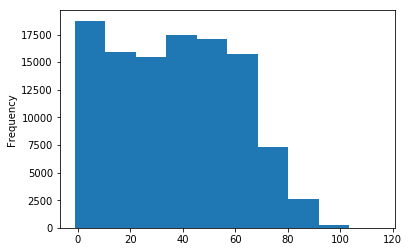

In [10]:
df['Age'].plot(kind='hist');

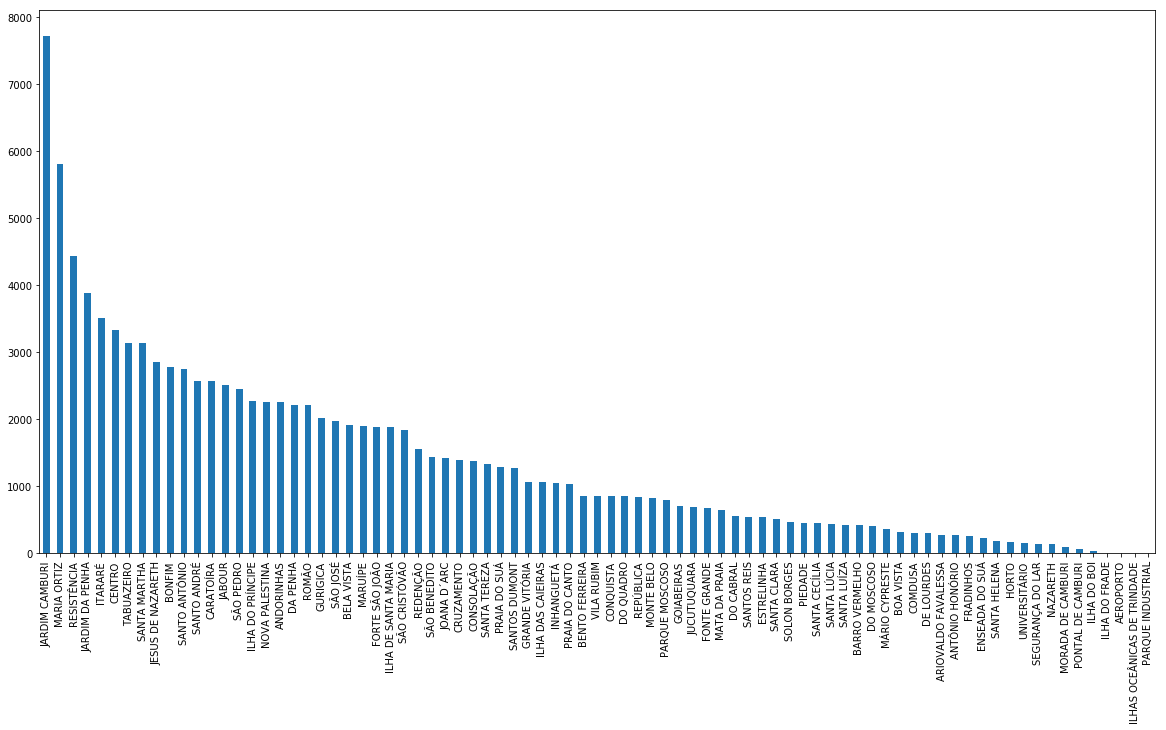

In [11]:
df['Neighbourhood'].value_counts().plot(kind='bar', figsize=(20,10));

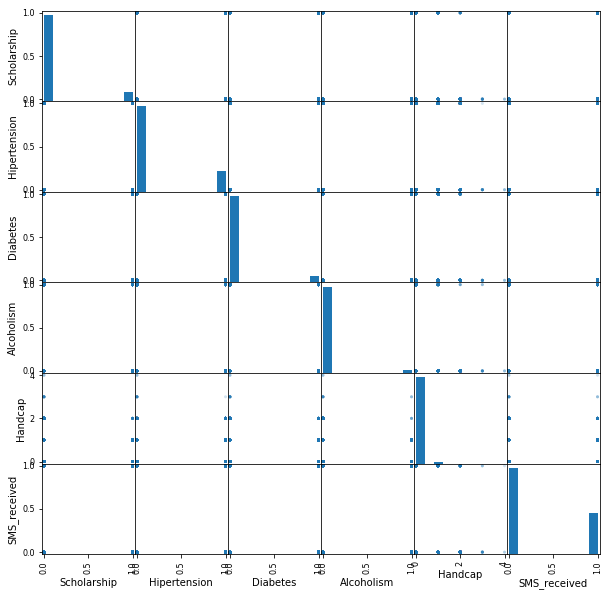

In [12]:
pd.plotting.scatter_matrix(df.iloc[:,7:13], alpha=0.2, figsize=(10, 10));

The hyphen in the No-show column name will be replaced with an underscore to easily remember.

In [13]:
df.rename(columns = {'No-show':'No_show'},inplace = True)
df['No_show'].value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

### 2.3 Data Restructuring

> After understanding the dataset with the inspecting and cleaning processes, I will be adding the different time variable by substracting the ScheduledDay values from the AppointmentDay values. Again, ScheduledDay is the time when the patient makes an appintment for visiting to a hospital, and AppointmentDay is the time when the patient needs to be present to see a doctor. Therefore, ScheduleDay should be earlier than AppointmentDay. My assumption is that the behavior of 'show' can be affected by the different time. As the different time increase, the no-show cases might increase.  
Also, AppointmentDay will be diverged into two subsets of 'time of day' and 'day of week' by adding two columns themselves. My assumption is that the morning and afternoon appointment times might affect no-show cases as well as that different day of the week would affect the no-show behavior. 

In [14]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [15]:
df['diff_time'] =  df['AppointmentDay'] - df['ScheduledDay']
df['diff_time'] = (df['diff_time'] / np.timedelta64(1, 'D'))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
diff_time         110527 non-null float64
dtypes: datetime64[ns, UTC](2), float64(2), int64(8), object(3)
memory usage: 12.6+ MB


> The diff_time column has been generated by subtracting the ScheduledDay column from the AppointmentDay column and converted to float number by dividing `np.timedelta64(1, 'D')` which is allowed to count by days. 

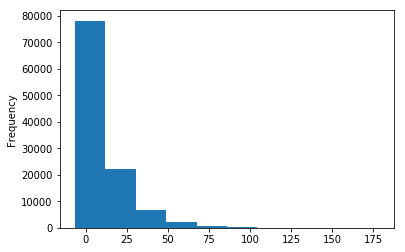

In [17]:
df.diff_time.plot.hist()

In [18]:

len(df.diff_time[df.diff_time>0]), len(df.diff_time[df.diff_time<0])


(71959, 38568)

> It seems like there are diff_time variables less than 0 from the above histogram. I think it is because there the same day of ScheduledDay and AppointmentDay values and there is no timestamp value in the AppointmentDay. When the diff_time values are generated by substracting the ScheduledDay values from AppointmentDay values and they are the same day, it will generate the negative values, but it should be less than 1 in the diff_time variable. 

In [19]:
df.diff_time.describe()

count    110527.000000
mean          9.714284
std          15.244073
min          -6.575926
25%          -0.346163
50%           3.473819
75%          14.320538
max         178.554873
Name: diff_time, dtype: float64

> However, the minimum value of diff_time is -6.575926. Let's check which medical appointment has the biggest time difference in a negative way, which is that the scheduledDay is later than the AppointmentDay as following.

In [20]:
df.diff_time[df.diff_time==min(df.diff_time)].index

Int64Index([71533], dtype='int64')

In [21]:
df.iloc[df.diff_time[df.diff_time==min(df.diff_time)].index]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,diff_time
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6.575926


In [22]:
#df['No_show'].value_counts()
show = df.No_show == 'No'
no_show = df.No_show == 'Yes'

In [23]:
len(df.diff_time[df.diff_time<-1])

5

> The five instances are error because the AppointmentDay is one or more days earlier than the ScheduleDay, so the error instances in terms of appointment-earlier-than-scheduled time are deleted. 

In [24]:
df.diff_time[df.diff_time<-1]

27033   -1.452697
55226   -1.618530
64175   -1.572199
71533   -6.575926
72362   -1.285382
Name: diff_time, dtype: float64

In [25]:
df.drop(df.diff_time[df.diff_time<-1].index, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110522 non-null float64
AppointmentID     110522 non-null int64
Gender            110522 non-null object
ScheduledDay      110522 non-null datetime64[ns, UTC]
AppointmentDay    110522 non-null datetime64[ns, UTC]
Age               110522 non-null int64
Neighbourhood     110522 non-null object
Scholarship       110522 non-null int64
Hipertension      110522 non-null int64
Diabetes          110522 non-null int64
Alcoholism        110522 non-null int64
Handcap           110522 non-null int64
SMS_received      110522 non-null int64
No_show           110522 non-null object
diff_time         110522 non-null float64
dtypes: datetime64[ns, UTC](2), float64(2), int64(8), object(3)
memory usage: 13.5+ MB


> Now we have 110,521 medical appointment rows.

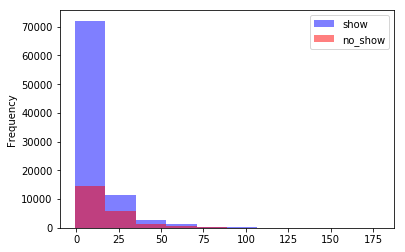

In [27]:
df.diff_time[show].plot(kind='hist', color ='b', label = 'show', alpha = 0.5)
df.diff_time[no_show].plot(kind='hist', color = 'r',label = 'no_show', alpha = 0.5)
plt.legend();

> The following is the day of the week (Monday=0, Sunday=6) and day of the time column will be added into the dataset. 

In [28]:
df['appoint_dayofweek'] = df['AppointmentDay'].dt.dayofweek
# The day of the week with Monday=0, Sunday=6.

In [29]:
df['appoint_timestamp'] = df['AppointmentDay'].dt.time
# since AppointmentDay does not have timestamp, it is useless. 
# The beginning assumption was that morning and afternoon appointment could be different no-show behavior. 


In [30]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,diff_time,appoint_dayofweek,appoint_timestamp
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-0.776481,4,00:00:00
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-0.672535,4,00:00:00


> Since I noticed that AppointmentDay does not have time information, but only date information. So the time of the day in Appointment is useless. The appoint_timestamp column is going to be deleted.

In [31]:
df=df.drop('appoint_timestamp',1)

In [32]:
df.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,diff_time,appoint_dayofweek
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,34.614178,1
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,34.689201,1
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,40.330648,1
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,40.368484,1
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No,40.436852,1


In [33]:
df['PatientId'] = df['PatientId'].apply(lambda x: '%.0f' %x)
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,diff_time,appoint_dayofweek
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-0.776481,4
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-0.672535,4


> To check if there is more than just number on AppointmentID and PatientID, the count of the duplicated on AppointmentID and PatientID can be conducted to check if there is duplicated ones in the dataset.

In [34]:
len(df[df['AppointmentID'].duplicated() == True])

0

In [35]:
len(df[df['PatientId'].duplicated() == True])

48223

> There is no duplicated AppointmentID, but there are duplicated PatientID.

In [36]:

df['No_show'] = df['No_show'].replace("No", 0)
df['No_show'] = df['No_show'].replace("Yes", 1)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,diff_time,appoint_dayofweek
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-0.776481,4
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-0.672535,4
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-0.679907,4
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-0.728831,4
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-0.671794,4


In [37]:
df['No_show_count'] = df.groupby('PatientId')['No_show'].apply(lambda x: x.cumsum())

In [38]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,diff_time,appoint_dayofweek,No_show_count
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-0.776481,4,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-0.672535,4,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-0.679907,4,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-0.728831,4,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-0.671794,4,0


> To count the duplicated patientID, the yes cases of No_show have been converted to 1 (no-show case). Otherwise, 0. The No_show_count column is added with the total number of no_show cases per patientID.

In [39]:
max(df.No_show_count)

18

In [40]:
df[df.No_show_count == 18].PatientId.values[0]

'1421986987763'

In [41]:
df[df.PatientId ==df[df.No_show_count == 18].PatientId.values[0]]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,diff_time,appoint_dayofweek,No_show_count
53206,1421986987763,5683659,M,2016-05-11 07:44:50+00:00,2016-05-11 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-0.322801,2,1
53218,1421986987763,5660212,M,2016-05-04 15:50:42+00:00,2016-05-04 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-0.660208,2,2
53323,1421986987763,5660224,M,2016-05-04 15:51:21+00:00,2016-05-04 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-0.660660,2,3
53381,1421986987763,5740918,M,2016-05-25 16:34:32+00:00,2016-05-25 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-0.690648,2,4
53387,1421986987763,5683709,M,2016-05-11 07:47:24+00:00,2016-05-11 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-0.324583,2,5
53400,1421986987763,5660301,M,2016-05-04 16:05:24+00:00,2016-05-04 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-0.670417,2,6
53418,1421986987763,5660316,M,2016-05-04 16:07:01+00:00,2016-05-04 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-0.671539,2,7
70906,1421986987763,5740886,M,2016-05-25 16:28:35+00:00,2016-05-25 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-0.686516,2,8
70914,1421986987763,5683830,M,2016-05-11 07:55:08+00:00,2016-05-11 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-0.329954,2,9
70935,1421986987763,5660323,M,2016-05-04 16:08:03+00:00,2016-05-04 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-0.672257,2,10


> The above dataset has the patient no-show appointment rows who has the highest No_show_count which is 18 in the dataset.

<a id='eda'></a>
## 3. Exploratory Data Analysis



### 3.1 Does any variable affect the patient behavior of show or no-show?
> We are going to look at one variable at a time with any relationship between the variable and the patient show or no-show behavior

### 3.1.1 Gender

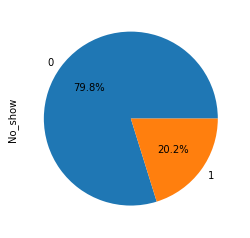

In [42]:
df.No_show.value_counts().plot(kind='pie', autopct='%1.1f%%');


> From the pie chart, we can clearly see that almost 80 percent of patients went to see a doctor after making an appointment while around 20 percent of patients did not go to the hospital, ignoring the appointment. 

> We are going through all variables from Gender to appoint_dayofweek with bar plots as following.

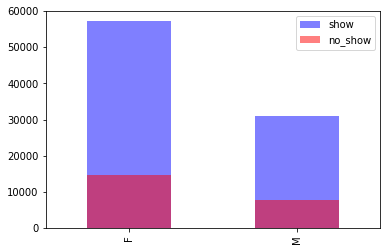

In [43]:
df.Gender[show].value_counts().plot(kind='bar', color ='b', label = 'show', alpha = 0.5)
df.Gender[no_show].value_counts().plot(kind='bar', color = 'r',label = 'no_show', alpha = 0.5)
plt.legend();

> From this bar plot, we cannot see clearly any gender type affect the attending bahavior. therefore, we decided to have the bar plot based on a proportion of show or no-show per gender type.

In [44]:
def plotplot(datatype):

    prop_show = df[datatype][show].value_counts() / len(df[datatype][show])
    prop_no_show = df[datatype][no_show].value_counts() / len(df[datatype][no_show])

    import numpy as np
    ind = np.arange(len(df[datatype].value_counts())) 

    # the x locations for the groups
    width = 0.3  

    # plot bars
    plt.bar(ind + width, prop_show, width, color='b', alpha=.7, label='show')
    plt.bar(ind, prop_no_show, width, color='r', alpha=.7, label='no_show')


    # title and labels
    plt.ylabel('Proportion')
    plt.xlabel('{}'.format (datatype))
    plt.title('Attending Behavior Proportion by {}'.format (datatype))
    locations = ind + width / 2  # xtick locations
    labels = df[datatype].value_counts().index  # xtick labels
    plt.xticks(locations, labels)

    # legend
    plt.legend()

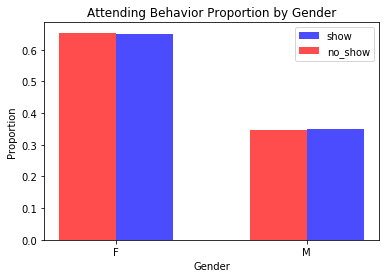

In [45]:
plotplot('Gender')

In [46]:
df.groupby('Gender')['No_show'].value_counts()

Gender  No_show
F       0          57246
        1          14591
M       0          30962
        1           7723
Name: No_show, dtype: int64

> From the attending bahavior proportion bar plot by Gender, we can see that there is no difference of attending behavior to the hospital be different gender type. 

### 3.1.2 Age

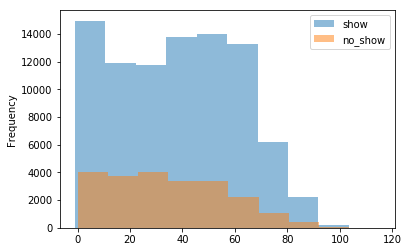

In [47]:
df.Age[show].plot(kind='hist',label = 'show', alpha = 0.5)
df.Age[no_show].plot(kind='hist',label = 'no_show', alpha = 0.5)
plt.legend();


> To find any specific group of age affect the attending behavior we are plotting of the histograms of age for show and no-show. From the histogram plot, we can get a notice that there might be a negative value in the age column.
Let's go to find them and delete them.

In [48]:
df.Age.describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [49]:
df.query('Age < 0').index

Int64Index([99832], dtype='int64')

In [50]:
df.drop(df.query('Age < 0').index, inplace=True)

In [51]:
df.Age[show].describe()

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

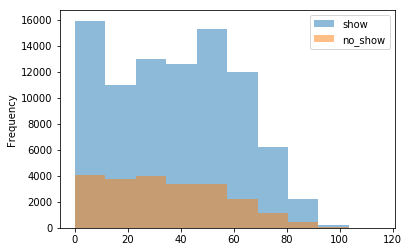

In [52]:
df.Age[show].plot(kind='hist',label = 'show', alpha = 0.5)
df.Age[no_show].plot(kind='hist',label = 'no_show', alpha = 0.5)
plt.legend();

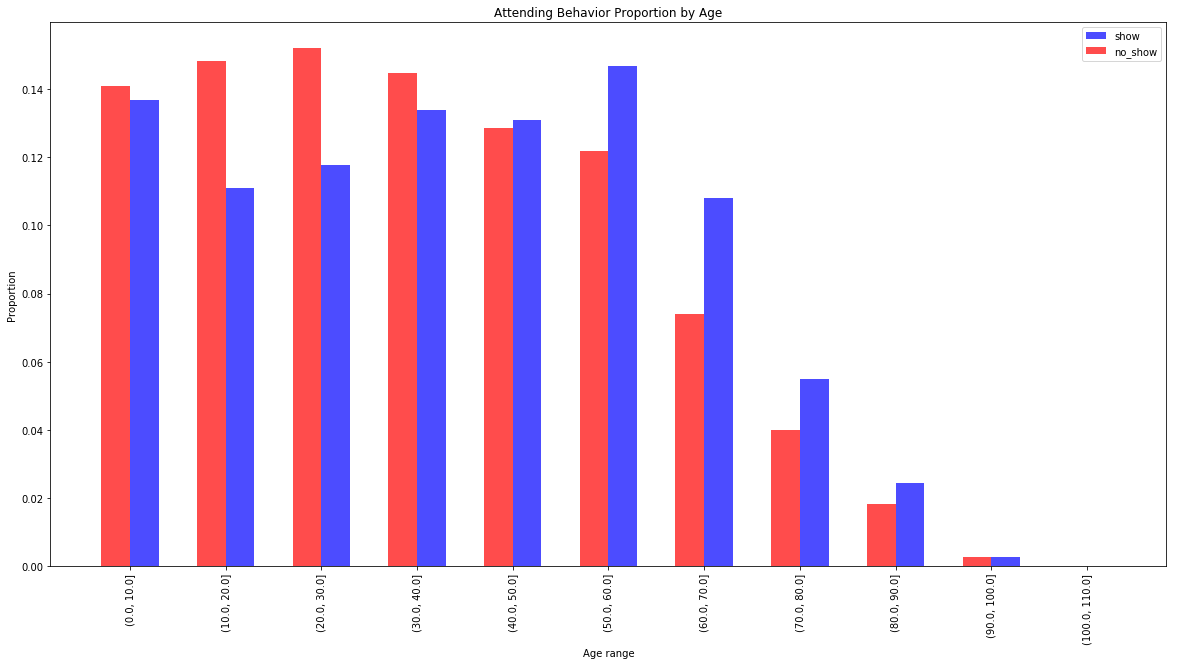

In [53]:
show_diff = df.Age[show].groupby(pd.cut(df.Age[show], bins=np.linspace(0, 110, 12))).count() / df.Age[show].count()

no_show_diff=df.Age[no_show].groupby(pd.cut(df.Age[no_show], bins=np.linspace(0, 110, 12))).count() /df.Age[no_show].count()


import numpy as np
ind = np.arange(11) 

# the x locations for the groups
width = 0.3  

# plot bars
plt.figure(figsize = (20,10))
plt.bar(ind + width, show_diff.values, width, color='b', alpha=.7, label='show')
plt.bar(ind, no_show_diff.values, width, color='r', alpha=.7, label='no_show')

datatype = 'Age'
# title and labels
plt.ylabel('Proportion')
plt.xlabel('{}'.format (datatype +' range'))
plt.title('Attending Behavior Proportion by {}'.format (datatype))
locations = ind + width / 2  # xtick locations
labels = show_diff.index  # xtick labels
plt.xticks(locations, labels,rotation=90)

# legend
plt.legend();

> From the above plot of the attending behavior proportion by age, which was generated with ratio of each of the attending behaviors by the age ranges over the each of the total attending behaviors, it is observed that higher the age range, the higher attending rate they have.  

### 3.1.3 Neighborhood

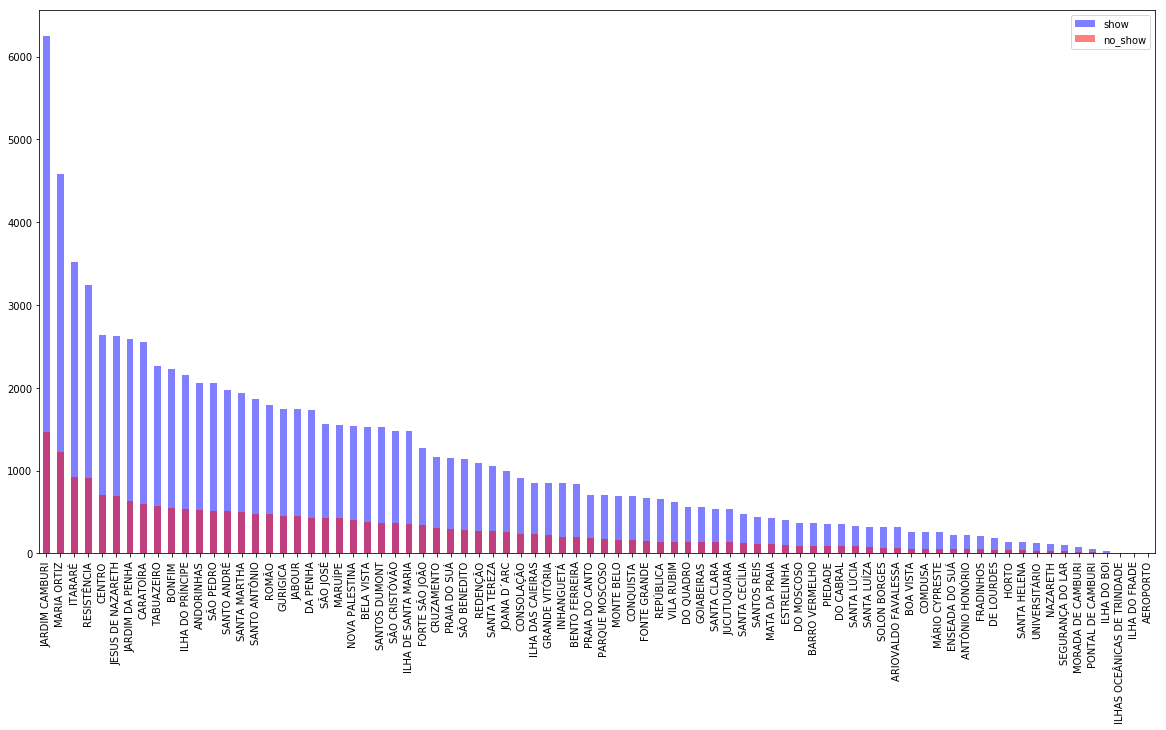

In [54]:
df.Neighbourhood[show].value_counts().plot(kind='bar',color ='b',label = 'show', alpha = 0.5, figsize=(20,10))
df.Neighbourhood[no_show].value_counts().plot(kind='bar',color ='r',label = 'no_show', alpha = 0.5, figsize=(20,10))
plt.legend();



> This is the bar plot of attending behavior by different regions. It does not look like it is easy to compare show and no-show cases over different regions. Therefore, the following proportion plot was made. 

In [55]:
#plotplot('Neighbourhood')

datatype = 'Neighbourhood'
prop_show = df[datatype][show].value_counts() / len(df[datatype][show])
prop_no_show = df[datatype][no_show].value_counts() / len(df[datatype][no_show])



In [56]:
set1 = df['Neighbourhood'][show].value_counts().index
set2 = df['Neighbourhood'][no_show].value_counts().index
set1 = set(set1)
set2 = set(set2)
missing_at_2 = list(sorted(set1 - set2))
missing_at_1 = list(sorted(set2 - set1))
missing_at_1[0],missing_at_2[0]


('ILHAS OCEÂNICAS DE TRINDADE', 'PARQUE INDUSTRIAL')

> we found that there is each missing region in the region sets of show cases and no-show cases respectively. 

In [57]:
prop_no_show[missing_at_2[0]] =0
prop_show[missing_at_1[0]] =0


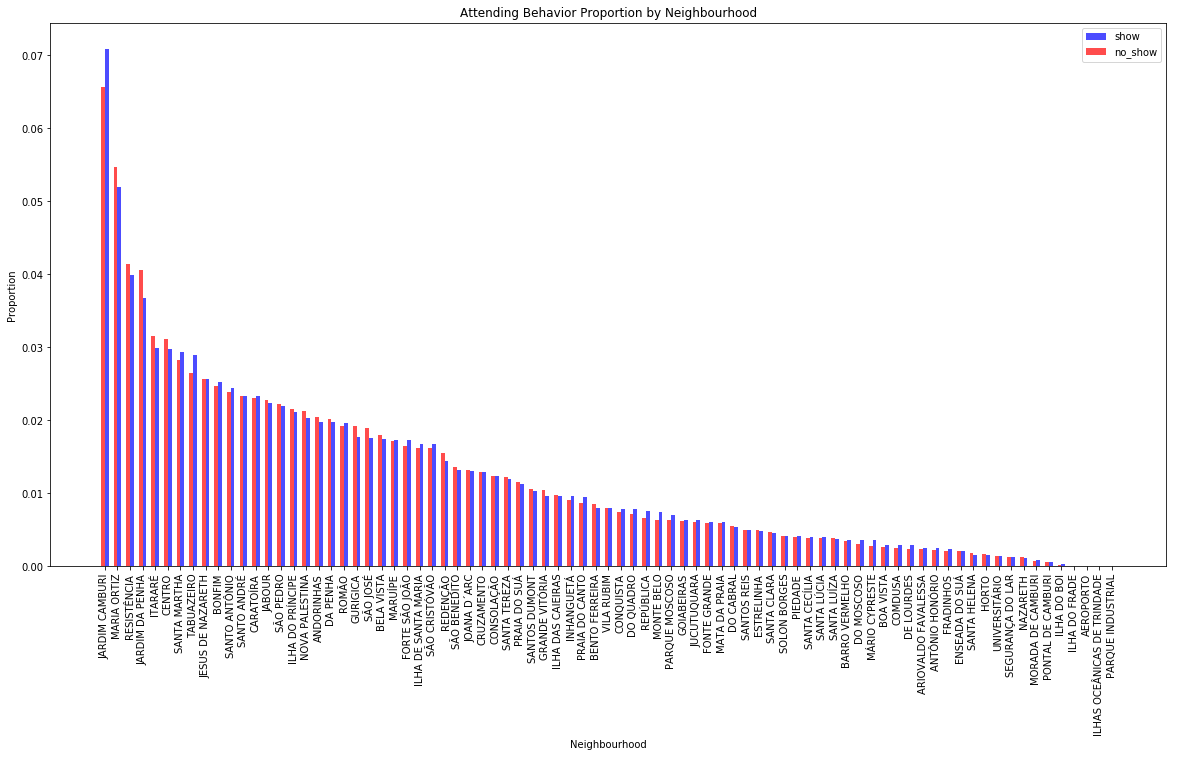

In [58]:


import numpy as np
ind = np.arange(len(df[datatype].value_counts())) 

# the x locations for the groups
width = 0.3  

# plot bars
plt.figure(figsize = (20,10))
plt.bar(ind + width, prop_show, width, color='b', alpha=.7, label='show')
plt.bar(ind, prop_no_show, width, color='r', alpha=.7, label='no_show')


# title and labels
plt.ylabel('Proportion')
plt.xlabel('{}'.format (datatype))
plt.title('Attending Behavior Proportion by {}'.format (datatype))
locations = ind + width / 2  # xtick locations
labels = df[datatype].value_counts().index  # xtick labels
plt.xticks(locations, labels,rotation=90)

# legend
plt.legend();

> This plot was made with the proportion of each neighborhood over each category (show and no_show). However, this plot does not show that the proportion of show and no_show over each neighborhood, for the following plot was made. 

C:\Users\altai\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\altai\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


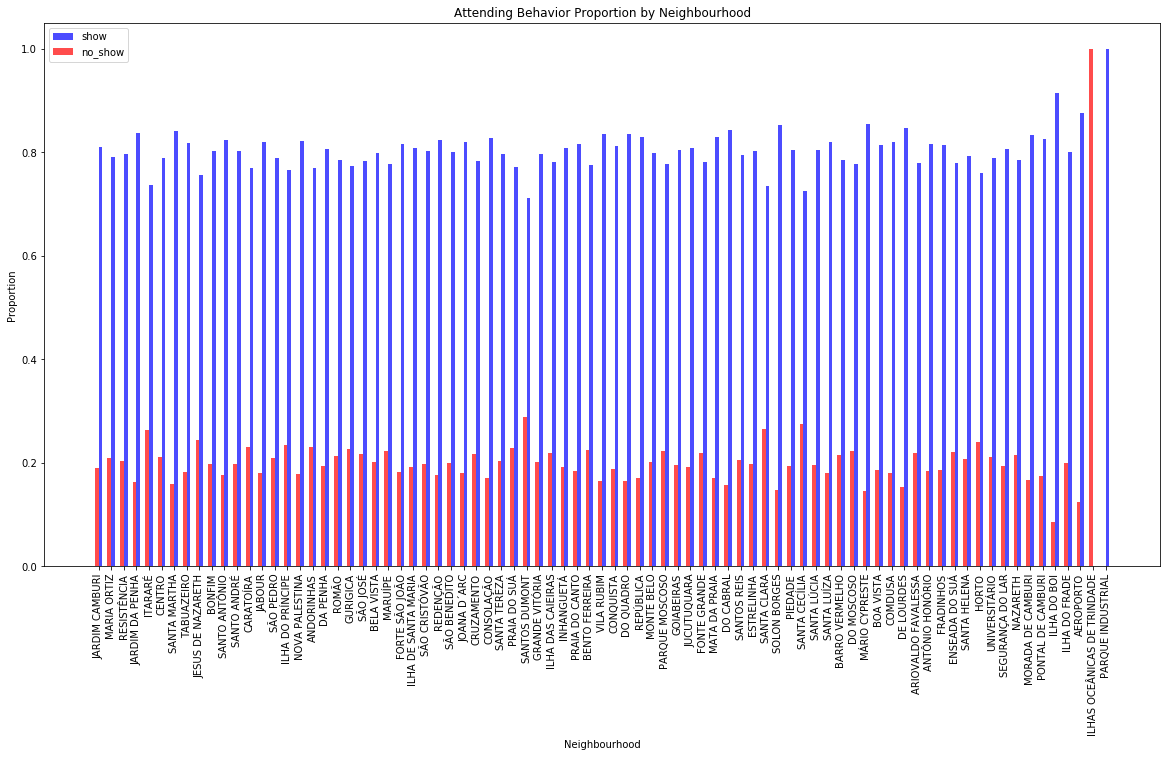

In [59]:
#plotplot('Neighbourhood')


def plotplot_2(datatype):
    citylist=df[datatype].value_counts().index
    prop_show = []
    prop_no_show = []
    for i in citylist:
        mask = df[datatype] == i
        show_count = len(df[mask][show])
        noshow_count = len(df[mask][no_show])
        prop_show.append(show_count/(show_count+noshow_count))
        prop_no_show.append(noshow_count/(show_count+noshow_count))


    #prop_show = df[datatype][show].value_counts() / len(df[datatype][show])
    #prop_no_show = df[datatype][no_show].value_counts() / len(df[datatype][no_show])
    '''
    set1 = df['Neighbourhood'][show].value_counts().index
    set2 = df['Neighbourhood'][no_show].value_counts().index
    set1 = set(set1)
    set2 = set(set2)
    missing_at_2 = list(sorted(set1 - set2))
    missing_at_1 = list(sorted(set2 - set1))
    missing_at_1[0],missing_at_2[0]

    prop_no_show[missing_at_2[0]] =0
    prop_show[missing_at_1[0]] =0
    '''


    import numpy as np
    ind = np.arange(len(df[datatype].value_counts())) 

    # the x locations for the groups
    width = 0.3  

    # plot bars
    plt.figure(figsize = (20,10))
    plt.bar(ind + width, prop_show, width, color='b', alpha=.7, label='show')
    plt.bar(ind, prop_no_show, width, color='r', alpha=.7, label='no_show')


    # title and labels
    plt.ylabel('Proportion')
    plt.xlabel('{}'.format (datatype))
    plt.title('Attending Behavior Proportion by {}'.format (datatype))
    locations = ind + width / 2  # xtick locations
    labels = df[datatype].value_counts().index  # xtick labels
    plt.xticks(locations, labels,rotation=90)

    # legend
    plt.legend();

plotplot_2('Neighbourhood')

In [60]:

citylist = df['Neighbourhood'].value_counts().index

In [61]:
print('The last two neiborhood are ' + citylist[-2:][0] +' and ' + citylist[-2:][1] )

The last two neiborhood are ILHAS OCEÂNICAS DE TRINDADE and PARQUE INDUSTRIAL


In [62]:

df[datatype].value_counts()[citylist[-2:][0]], df[datatype].value_counts()[citylist[-2:][1]]

(2, 1)

### 3.1.4 Scholarship

In [63]:
df.Scholarship[show].value_counts()

0    79924
1     8283
Name: Scholarship, dtype: int64

0    88207
1    22314
Name: No_show, dtype: int64

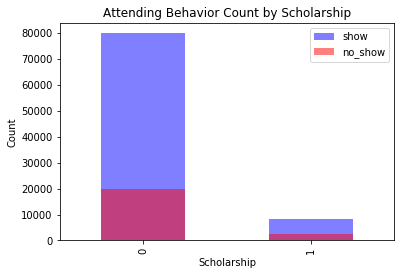

In [64]:
df.Scholarship[show].value_counts().plot(kind='bar', color ='b', label = 'show', alpha = 0.5)
df.Scholarship[no_show].value_counts().plot(kind='bar', color = 'r',label = 'no_show', alpha = 0.5)
plt.legend();
plt.xlabel('Scholarship')
plt.ylabel('Count')
plt.title('Attending Behavior Count by ' + 'Scholarship');
df.groupby('No_show').Scholarship.value_counts() #df.No_show.value_counts()
df.No_show.value_counts()

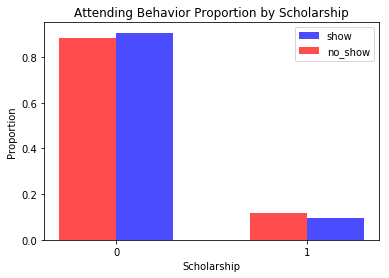

In [65]:
plotplot('Scholarship')

> Two bar charts are created for the relationship between schoalrship and attending behavior in the dataset. First bar plot shows that the numbers of Scholarship by attending behaviors (show and no_show). The sample size of dataset of attending behavior are unbalanced, so it does not look like the plot is easy to answer that the Scholarship affects to the attending bahavior. Therefore, the second bar plot was made with calculating the proportions of Scholarship over the attending behavior. Even though the numbers of each attending behavior are unbalanced, each of them is more than 20K which is enough to be compared. From the second plot, it is observed that the proportions of attending behavior over scholarship are similar even though patients with the scholarship are a little bit more not to make the appointment than patients without the scholarship.  

### 3.1.5 Hipertension

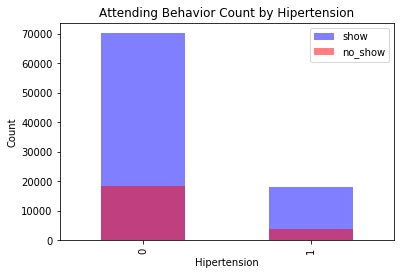

In [66]:
df.Hipertension[show].value_counts().plot(kind='bar', color ='b', label = 'show', alpha = 0.5)
df.Hipertension[no_show].value_counts().plot(kind='bar', color = 'r',label = 'no_show', alpha = 0.5)
plt.legend();
plt.xlabel('Hipertension')
plt.ylabel('Count')
plt.title('Attending Behavior Count by ' + 'Hipertension');

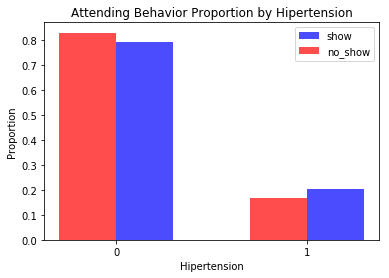

In [67]:
plotplot('Hipertension')

> Two bar charts are created for the relationship between Hipertension and attending behavior in the dataset. First bar plot shows that the numbers of the Hipertension by attending behaviors (show and no_show). The sample size of dataset of attending behavior are unbalanced, so it does not look like the plot is easy to answer that the Hipertension affects to the attending bahavior. Therefore, the second bar plot was made with calculating the proportions of Hipertension over each of the attending behavior. Even though the numbers of each attending behavior are unbalanced, each of them is more than 20K, which is enough to be compared. From the second plot, it is observed that the proportions of attending behavior with or without Hipertension are similar even though patients with the Hipertension are a little bit more to make the appointment than patients without the Hipertension. 

### 3.1.6 Diabetes

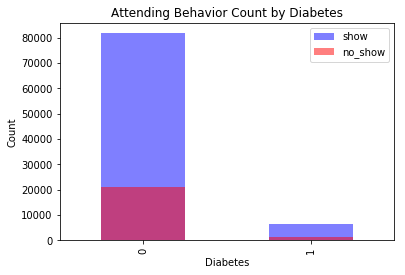

In [68]:
df.Diabetes[show].value_counts().plot(kind='bar', color ='b', label = 'show', alpha = 0.5)
df.Diabetes[no_show].value_counts().plot(kind='bar', color = 'r',label = 'no_show', alpha = 0.5)
plt.legend();
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Attending Behavior Count by ' + 'Diabetes');

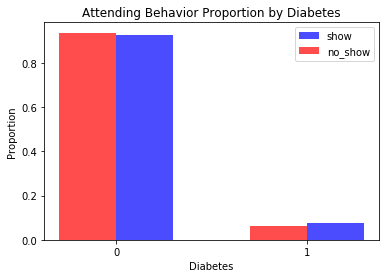

In [69]:
plotplot('Diabetes')

> Two bar charts are created for the relationship between Diabetes and attending behavior in the dataset. First bar plot shows that the numbers of the Diabetes by attending behaviors (show and no_show). The sample size of dataset of attending behavior are unbalanced, so it does not look like the plot is easy to answer that the Diabetes affects to the attending bahavior. Therefore, the second bar plot was made with calculating the proportions of Diabetes over each of the attending behavior. Even though the numbers of each attending behavior are unbalanced, each of them is more than 20K, which is enough to be compared. From the second plot, it is observed that the proportions of attending behavior with or without Diabetes are similar even though patients with the Diabetes are a little more likely to make the appointment than patients without the Diabetes. 

### 3.1.7 Alcoholism

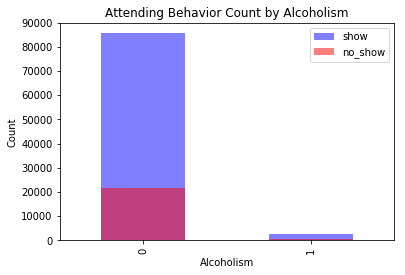

In [70]:

df.Alcoholism[show].value_counts().plot(kind='bar', color ='b', label = 'show', alpha = 0.5)
df.Alcoholism[no_show].value_counts().plot(kind='bar', color = 'r',label = 'no_show', alpha = 0.5)
#plt.grid(True)
plt.legend();
plt.xlabel('Alcoholism')
plt.ylabel('Count')
plt.title('Attending Behavior Count by ' + 'Alcoholism');

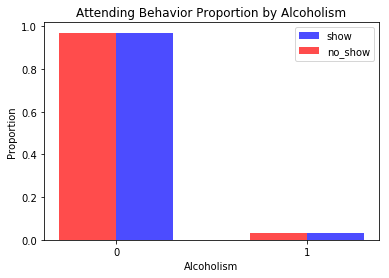

In [71]:
plotplot('Alcoholism')

> Two bar charts are created for the relationship between Alcoholism and attending behavior in the dataset. First bar plot shows that the numbers of the Alcoholism by attending behaviors (show and no_show). The sample size of dataset of attending behavior are unbalanced, so it does not look like the plot is easy to answer that the Alcoholism affects to the attending bahavior. Therefore, the second bar plot was made with calculating the proportions of Alcoholism over each of the attending behavior. Even though the numbers of each attending behavior are unbalanced, each of them is more than 20K, which is enough to be compared. From the second plot, it is observed that the proportions of attending behavior with or without Diabetes are similar. 

### 3.1.8 Handcap

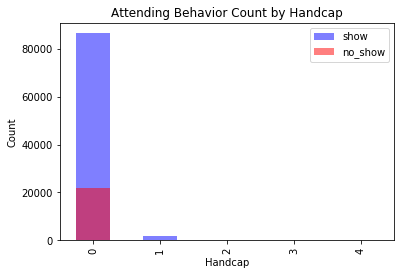

In [72]:

df.Handcap[show].value_counts().plot(kind='bar', color ='b', label = 'show', alpha = 0.5)
df.Handcap[no_show].value_counts().plot(kind='bar', color = 'r',label = 'no_show', alpha = 0.5)
plt.legend();
plt.xlabel('Handcap')
plt.ylabel('Count')
plt.title('Attending Behavior Count by ' + 'Handcap');

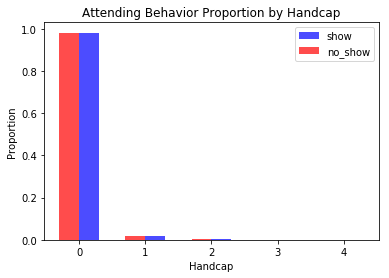

In [73]:
plotplot('Handcap')

In [74]:
df.groupby('No_show').Handcap.value_counts()

No_show  Handcap
0        0          86373
         1           1676
         2            146
         3             10
         4              2
1        0          21909
         1            364
         2             37
         3              3
         4              1
Name: Handcap, dtype: int64

> Two bar charts are created for the relationship between Handcap and attending behavior in the dataset. First bar plot shows that the numbers of the Handcap by attending behaviors (show and no_show). The sample size of dataset of attending behavior are unbalanced, so it does not look like the plot is easy to answer that the Diabetes Handcap to the attending bahavior. Therefore, the second bar plot was made with calculating the proportions of Handcap over each of the attending behavior. Even though the numbers of each attending behavior are unbalanced, each of them is more than 20K, which is enough to be compared. From the second plot, it is observed that the proportions of attending behavior with or without Handcap are similar. 

### 3.1.9 SMS_received

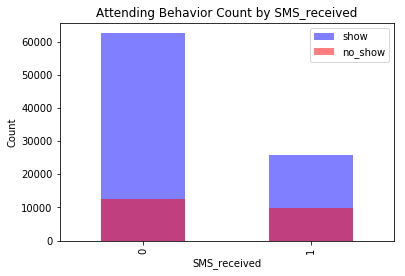

In [75]:
df.SMS_received[show].value_counts().plot(kind='bar', color ='b', label = 'show', alpha = 0.5)
df.SMS_received[no_show].value_counts().plot(kind='bar', color = 'r',label = 'no_show', alpha = 0.5)
plt.legend();
plt.xlabel('SMS_received')
plt.ylabel('Count')
plt.title('Attending Behavior Count by ' + 'SMS_received');

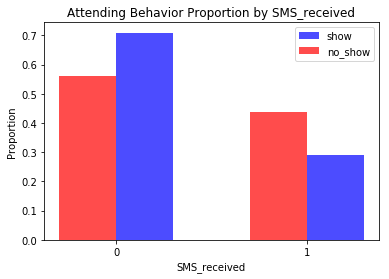

In [76]:
plotplot('SMS_received')

In [77]:
df.groupby('No_show').SMS_received.value_counts()

No_show  SMS_received
0        0               62509
         1               25698
1        0               12530
         1                9784
Name: SMS_received, dtype: int64

> Two bar charts are created for the relationship between SMS_received and attending behavior in the dataset. First bar plot shows that the numbers of the SMS_received by attending behaviors (show and no_show). The sample size of dataset of attending behavior are unbalanced, so it does not look like the plot is easy to answer that the SMS_received affects to the attending bahavior. Therefore, the second bar plot was made with calculating the proportions of SMS_received over each of the attending behavior. Even though the numbers of each attending behavior are unbalanced, each of them is more than 20K, which is enough to be compared. From the second plot, it is observed that the proportions of attending behavior with SMS_received are less than the proportion of not attending behavior with SMS_received. (negative effect)


### 3.2 Does extra generated variable affect the patient behavior of show or no-show?
> We are going to look at the following variables to see if there is  any relationships between the each variable and the patient show or no-show behavior.

<ul>
  <li>appoint_dayofweek</li>
  <li>diff_time</li>
  <li>No_show_count</li>

    
</ul>

### 3.2.1 appoint_dayofweek

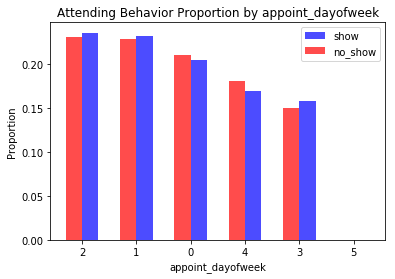

In [78]:
plotplot('appoint_dayofweek')
## The day of the week with Monday=0, Sunday=6.

C:\Users\altai\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\altai\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


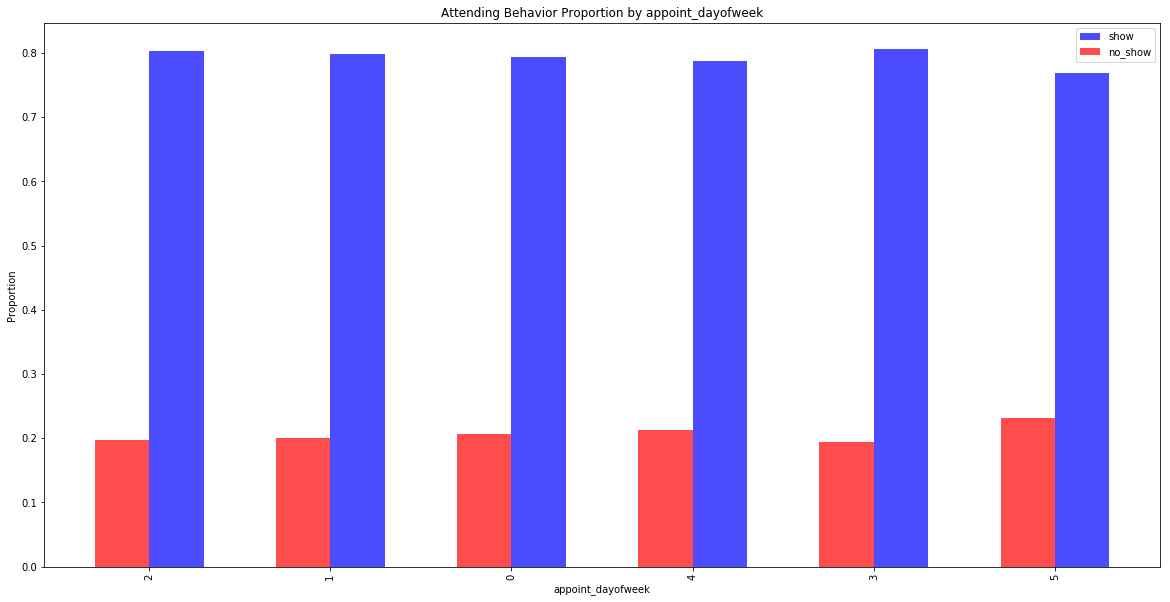

In [79]:
plotplot_2('appoint_dayofweek')

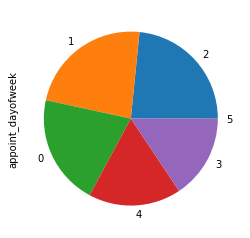

In [80]:
df.appoint_dayofweek.value_counts().plot(kind='pie')

> The first bar plot is the attending and not attending proportion plot of the day of week over each attending behavior while the second bar plot is the plot showing that the attending and not attending proprotions of the day of week over each day. 
> The number of appintment per each day are pretty similar except for Saturday (5), and the proprotions of attending and not attending per day are simliar. 

### 3.2.2 diff_time

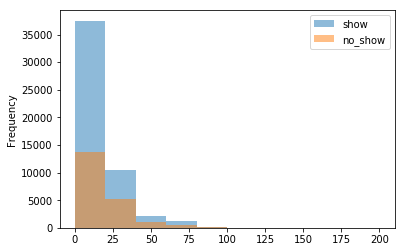

In [81]:
df.diff_time[show].plot(kind='hist',label = 'show', alpha = 0.5,bins=np.linspace(0, 200, 11))
df.diff_time[no_show].plot(kind='hist',label = 'no_show', alpha = 0.5,bins=np.linspace(0, 200, 11))
plt.legend();


In [82]:
max(df.diff_time), min(df.diff_time)

(178.5548726851852, -0.8645138888888889)

In [83]:
# Since there is negative values in diff_time which is a same-day appointment, bins should start from -1. 
show_diff = df.diff_time[show].groupby(pd.cut(df.diff_time[show], bins=np.linspace(-1, 199, 41))).count() / df.diff_time[show].count()
show_diff

diff_time
(-1.0, 4.0]       0.591166
(4.0, 9.0]        0.134513
(9.0, 14.0]       0.062739
(14.0, 19.0]      0.044758
(19.0, 24.0]      0.042706
(24.0, 29.0]      0.039430
(29.0, 34.0]      0.026404
(34.0, 39.0]      0.016348
(39.0, 44.0]      0.010464
(44.0, 49.0]      0.005260
(49.0, 54.0]      0.004161
(54.0, 59.0]      0.004580
(59.0, 64.0]      0.005589
(64.0, 69.0]      0.003900
(69.0, 74.0]      0.002301
(74.0, 79.0]      0.001859
(79.0, 84.0]      0.000748
(84.0, 89.0]      0.000748
(89.0, 94.0]      0.001077
(94.0, 99.0]      0.000147
(99.0, 104.0]     0.000091
(104.0, 109.0]    0.000181
(109.0, 114.0]    0.000113
(114.0, 119.0]    0.000079
(119.0, 124.0]    0.000045
(124.0, 129.0]    0.000023
(129.0, 134.0]    0.000079
(134.0, 139.0]    0.000000
(139.0, 144.0]    0.000057
(144.0, 149.0]    0.000000
(149.0, 154.0]    0.000000
(154.0, 159.0]    0.000045
(159.0, 164.0]    0.000102
(164.0, 169.0]    0.000079
(169.0, 174.0]    0.000000
(174.0, 179.0]    0.000204
(179.0, 184.0]    

In [84]:
no_show_diff=df.diff_time[no_show].groupby(pd.cut(df.diff_time[no_show], bins=np.linspace(-1, 199, 41))).count() /df.diff_time[no_show].count()
no_show_diff

diff_time
(-1.0, 4.0]       0.286009
(4.0, 9.0]        0.192346
(9.0, 14.0]       0.114457
(14.0, 19.0]      0.084162
(19.0, 24.0]      0.085059
(24.0, 29.0]      0.076096
(29.0, 34.0]      0.049520
(34.0, 39.0]      0.034597
(39.0, 44.0]      0.022452
(44.0, 49.0]      0.010576
(49.0, 54.0]      0.007394
(54.0, 59.0]      0.009232
(59.0, 64.0]      0.008201
(64.0, 69.0]      0.006857
(69.0, 74.0]      0.003944
(74.0, 79.0]      0.003675
(79.0, 84.0]      0.001120
(84.0, 89.0]      0.001165
(89.0, 94.0]      0.001165
(94.0, 99.0]      0.000134
(99.0, 104.0]     0.000448
(104.0, 109.0]    0.000000
(109.0, 114.0]    0.000090
(114.0, 119.0]    0.000000
(119.0, 124.0]    0.000000
(124.0, 129.0]    0.000045
(129.0, 134.0]    0.000224
(134.0, 139.0]    0.000045
(139.0, 144.0]    0.000134
(144.0, 149.0]    0.000045
(149.0, 154.0]    0.000045
(154.0, 159.0]    0.000269
(159.0, 164.0]    0.000090
(164.0, 169.0]    0.000045
(169.0, 174.0]    0.000000
(174.0, 179.0]    0.000359
(179.0, 184.0]    

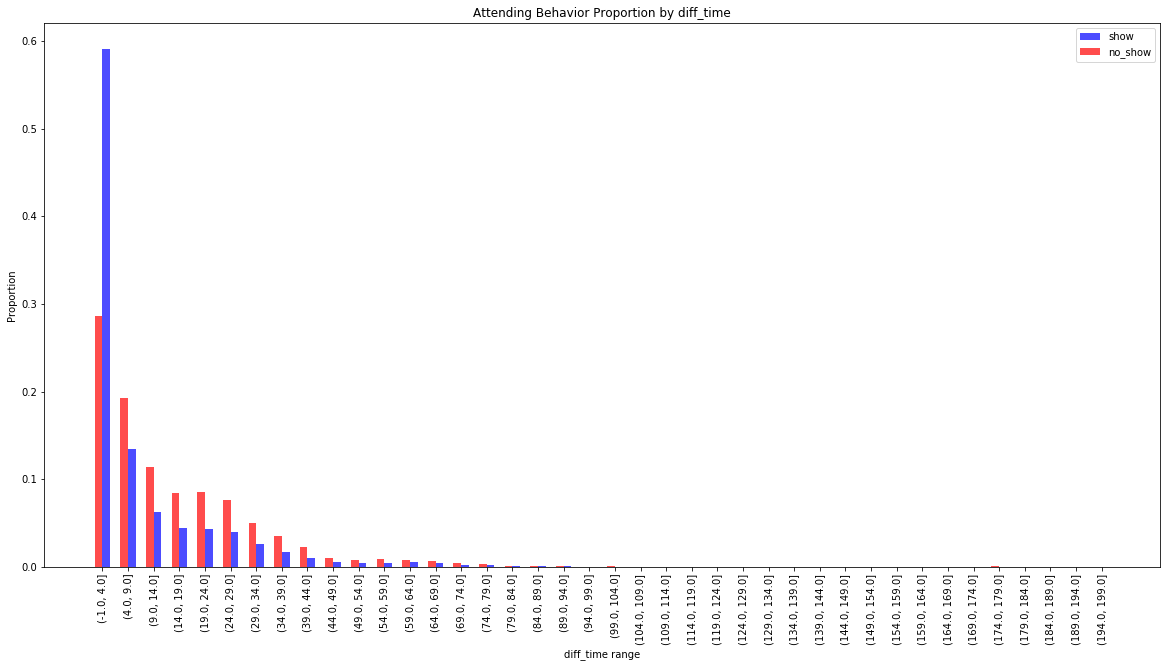

In [85]:
import numpy as np
ind = np.arange(40) 

# the x locations for the groups
width = 0.3  

# plot bars
plt.figure(figsize = (20,10))
plt.bar(ind + width, show_diff.values, width, color='b', alpha=.7, label='show')
plt.bar(ind, no_show_diff.values, width, color='r', alpha=.7, label='no_show')

datatype = 'diff_time'
# title and labels
plt.ylabel('Proportion')
plt.xlabel('{}'.format (datatype +' range'))
plt.title('Attending Behavior Proportion by {}'.format (datatype))
locations = ind + width / 2  # xtick locations
labels = show_diff.index  # xtick labels
plt.xticks(locations, labels,rotation=90)

# legend

plt.legend();

> Two bar charts are created for the relationship between SMS_received and attending behavior in the dataset. First bar plot shows that the numbers of the diff_time (the time substracting ScheduledDay from AppointmentDay represented `as a decimal fraction of a day`) by attending behaviors (show and no_show). The sample size of dataset of attending behavior are unbalanced, so it does not look like the plot is easy to answer that the diff_time affects to the attending bahavior. Therefore, the second bar plot was made with calculating the proportions of diff_time over each of the attending behavior. Even though the numbers of each attending behavior are unbalanced, each of them is more than 20K, which is enough to be compared. From the second plot, it is observed that when the diff_time is more than 4 days, mostly the proportions of not attending behavior are higher than the proportion of attending behavior.

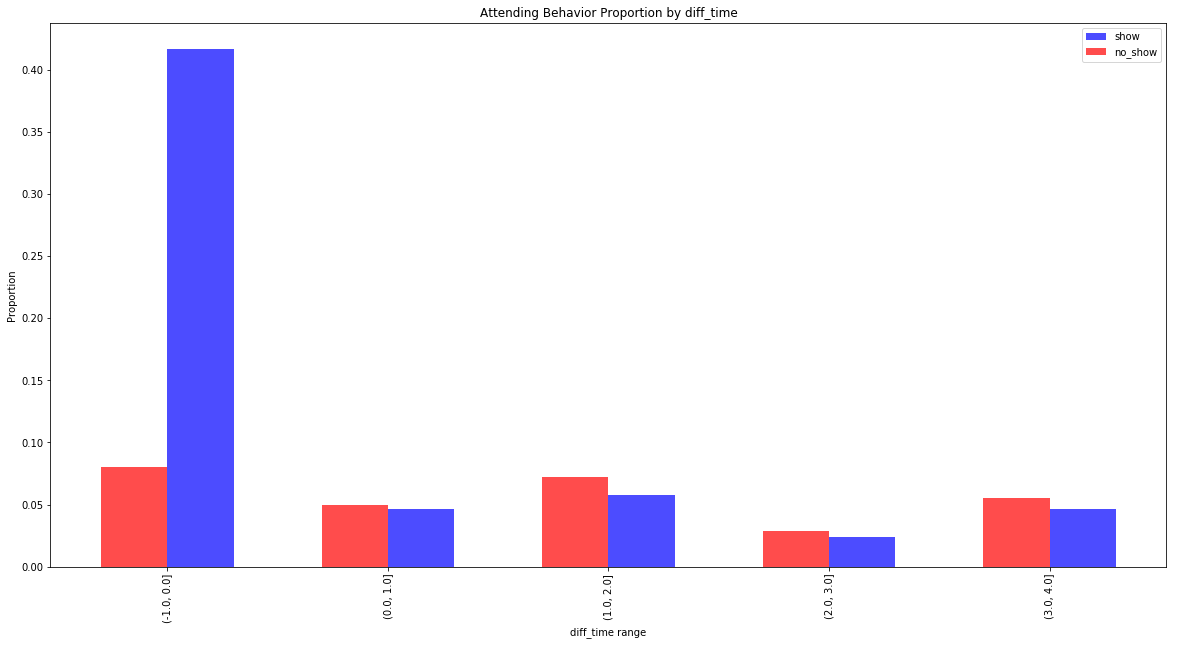

In [86]:
show_diff = df.diff_time[show].groupby(pd.cut(df.diff_time[show], bins=np.linspace(-1, 4, 6))).count() / df.diff_time[show].count()

no_show_diff=df.diff_time[no_show].groupby(pd.cut(df.diff_time[no_show], bins=np.linspace(-1, 4, 6))).count() /df.diff_time[no_show].count()


import numpy as np
ind = np.arange(5) 

# the x locations for the groups
width = 0.3  

# plot bars
plt.figure(figsize = (20,10))
plt.bar(ind + width, show_diff.values, width, color='b', alpha=.7, label='show')
plt.bar(ind, no_show_diff.values, width, color='r', alpha=.7, label='no_show')

datatype = 'diff_time'
# title and labels
plt.ylabel('Proportion')
plt.xlabel('{}'.format (datatype +' range'))
plt.title('Attending Behavior Proportion by {}'.format (datatype))
locations = ind + width / 2  # xtick locations
labels = show_diff.index  # xtick labels
plt.xticks(locations, labels,rotation=90)

# legend
plt.legend();

> To pay more attention less than 4 days of the diff_time, the above histogram of the diff_time at a bin size of 1 day is created. From the histogram, the attending behavior rates are remarkably reduced after the same-day appointment while the not attenting behavior rate is similar over 5 days including the ScheduledDay.


### 3.2.3 No_show_count

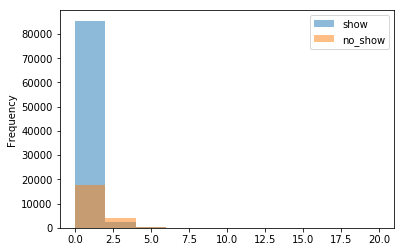

In [87]:
df.No_show_count[show].plot(kind='hist',label = 'show', alpha = 0.5, bins=np.linspace(0, 20, 11))
df.No_show_count[no_show].plot(kind='hist',label = 'no_show', alpha = 0.5, bins=np.linspace(0, 20, 11))
plt.legend();


In [88]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,diff_time,appoint_dayofweek,No_show_count
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-0.776481,4,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-0.672535,4,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-0.679907,4,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-0.728831,4,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-0.671794,4,0


So far all the tables were orgazined in AppointmentID because AppointmentID has unique value, but now the attending behavior will be analyzed as per PatientId by creating a new table. 

In [89]:
# the number of appointments per PatientID
count = df.groupby('PatientId')['AppointmentID'].count()


In [90]:
# the total number of show behaviors per PatientID
no_show_count = df.groupby('PatientId')['No_show_count'].max()

In [91]:
len(df.groupby('PatientId')['AppointmentID'].count()) == len(df.groupby('PatientId')['No_show_count'].max())

True

In [92]:
count = count.to_frame()
no_show_count = no_show_count.to_frame()

In [93]:
# merging two dataframe tables
df3 = count.merge(no_show_count, on='PatientId', how = 'inner')

In [94]:
df3.rename(columns={'AppointmentID': 'count'}, inplace=True)

In [95]:
df3.head()

,count,No_show_count
PatientId,,
11111462625267,1,0
111124532532143,2,1
11114485119737,1,1
11116239871275,1,0
1111633122891,3,0


In [96]:
df3.describe()

,count,No_show_count
count,62298.00000,62298.000000
mean,1.77407,0.358182
std,1.77023,0.689697
min,1.00000,0.000000
25%,1.00000,0.000000
50%,1.00000,0.000000
75%,2.00000,1.000000
max,88.00000,18.000000


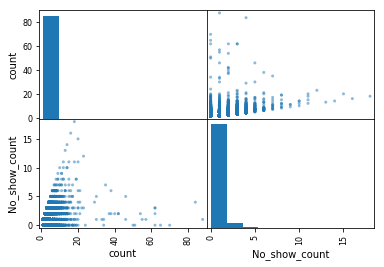

In [97]:
pd.plotting.scatter_matrix(df3);

In [98]:
# add rate column into the df3 dataframe table 
# with the ratio of the numbers of the attending behaviors over the numbers of appointments
df3['rate'] = df3['No_show_count'] / df3['count']

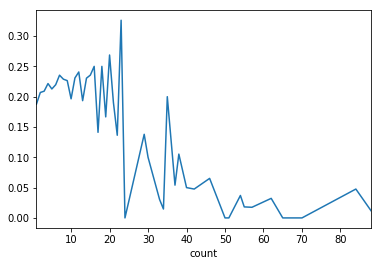

In [99]:
df3.groupby('count')['rate'].mean().plot()

> My assumption was that there would be a relationship between the ratio of the numbers of attending over the numbers of appointments and the number of appointments, but from the analysis we could not find any strong relationship. 

<a id='conclusions'></a>
## 4. Conclusions


> To answer which variable affect the patient behavior of attending to the appoint they made, we analyzed the given variables - gender, age, neighborhood, scholarship, hipertension, diabetes, alcoholism, handcap, and SMS_received - as well as the extra generated variables - day of appointment week (appoint_dayofweek), time gap between scheduled time and appointment time (diff_time), and number of attending counts per patientID (No_show_count). According to the analysis, age, neighborhood, hipertension,  SMS_received, diff_time matter to affect the patient behavior of attending to the hospital. 
One limitation would be that if the dataset has have the timestamp of appointmentDay, we would have added another analysis on whether the time of appointmentDay affect the attending behavior of the patients or not. 